In [ ]:
pip install scikit-plot

In [ ]:
#Importing the basic librarires

import os #file handling
import math
import scipy # It includes modules for optimization, integration,
import numpy as np #It provides support for arrays and matrices
import pandas as pd #It is used for data structures and data analysis tools.
import seaborn as sns #A data visualization library
from tqdm import tqdm #A library for adding progress bars
from sklearn import tree
from scipy.stats import randint #randint is a probability distribution function available in the scipy.stats
from scipy.stats import loguniform #loguniform is a probability distribution function also available in scipy.stats
from IPython.display import display #The display function is used to render and display

from sklearn.decomposition import PCA  #PCA (Principal Component Analysis) for dimensionality reduction.
from imblearn.over_sampling import SMOTE    #SMOTE (Synthetic Minority Over-sampling Technique) from the imbalanced-learn library for handling imbalanced datasets.
from sklearn.feature_selection import RFE   #RFE (Recursive Feature Elimination) from scikit-learn for feature selection.
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder and StandardScaler for one-hot encoding and feature scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # to split data into train and test
from statsmodels.stats.outliers_influence import variance_inflation_factor #module used for estimating and interpreting statistical models.

from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tuning and cross-validation.
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC #Support Vector Classifier
from xgboost import XGBClassifier #
from sklearn.naive_bayes import BernoulliNB #is a classifier based on the Naive Bayes algorithm
from sklearn.tree import DecisionTreeClassifier #
from sklearn.ensemble import RandomForestClassifier#
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #is used to create additional polynomial features by transforming the original features.

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6] # This line sets the default figure size for Matplotlib plots.

import warnings
warnings.filterwarnings('ignore')#used to handle warning messages.

pd.set_option('display.max_columns', 50)#It sets the maximum number of columns to be displayed when you print or view a DataFrame to 50.

In [ ]:
import pandas as pd

df = pd.read_csv('WineQT.csv')
#df.drop([''],axis=1, inplace=True)

target = 'quality'
labels = ['Quality-3','Quality-4','Quality-5','Quality-6','Quality-7','Quality-8'] # Categories of quality
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Inference: The Datset consists of 13 features & 1143 samples.


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 12 numerical & 0 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


            Target Variable Distribution           


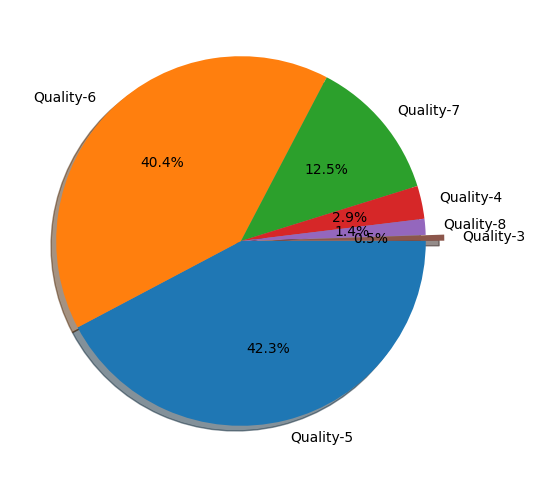

In [ ]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [ ]:
#Visualising the categorical features

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


<Figure size 1500x0 with 0 Axes>

                                                                                       Features Distribution                                                                                        


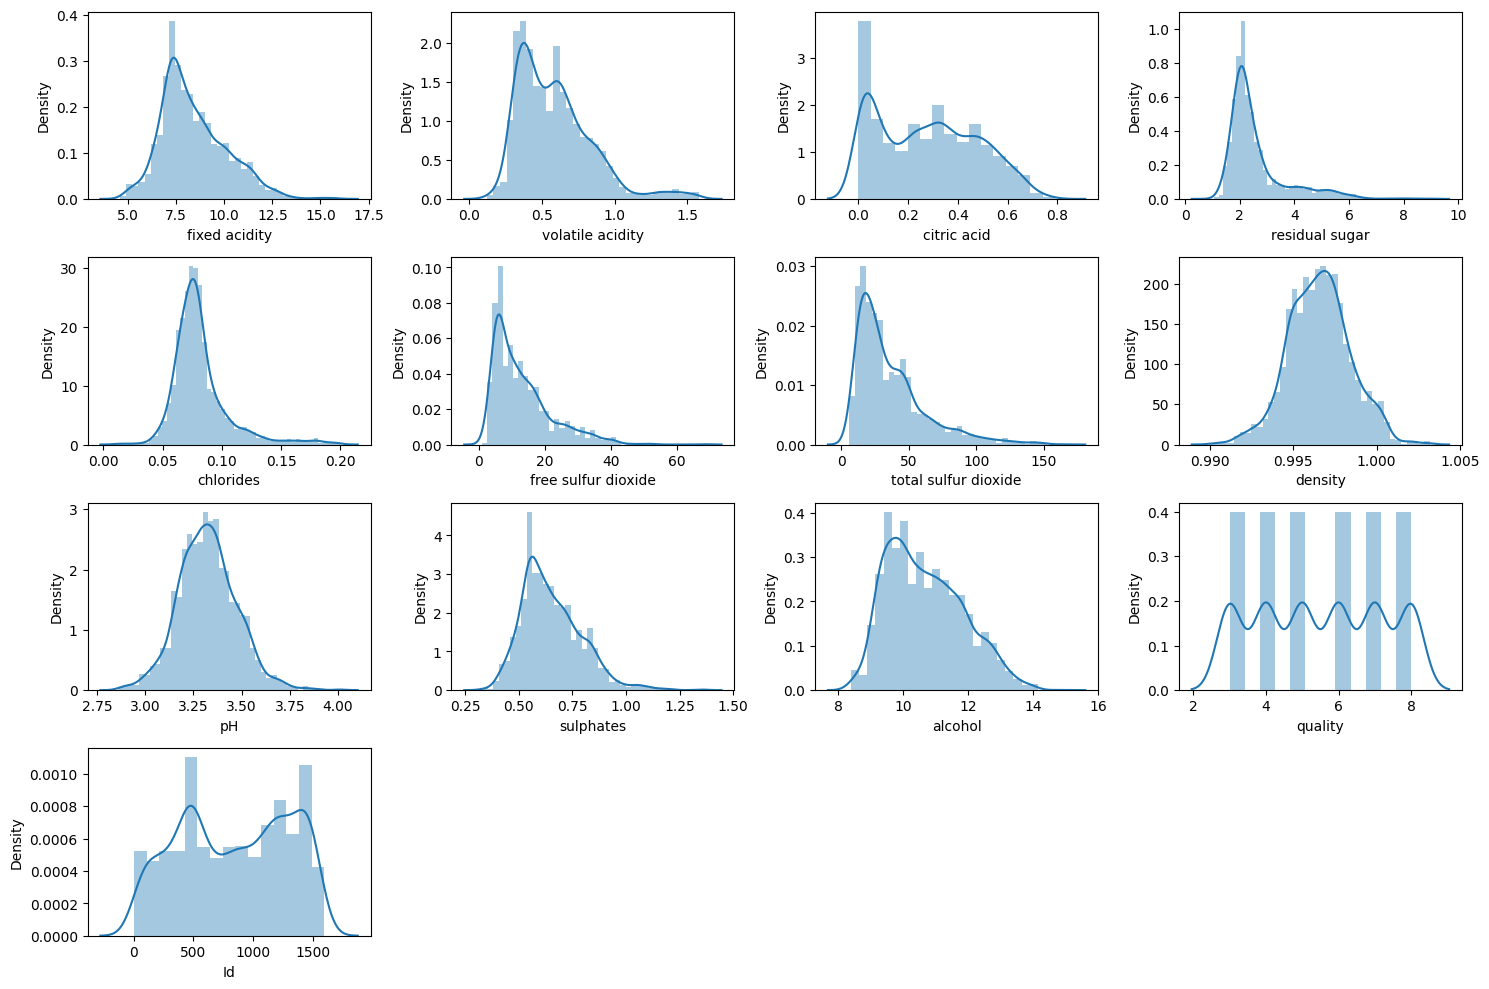

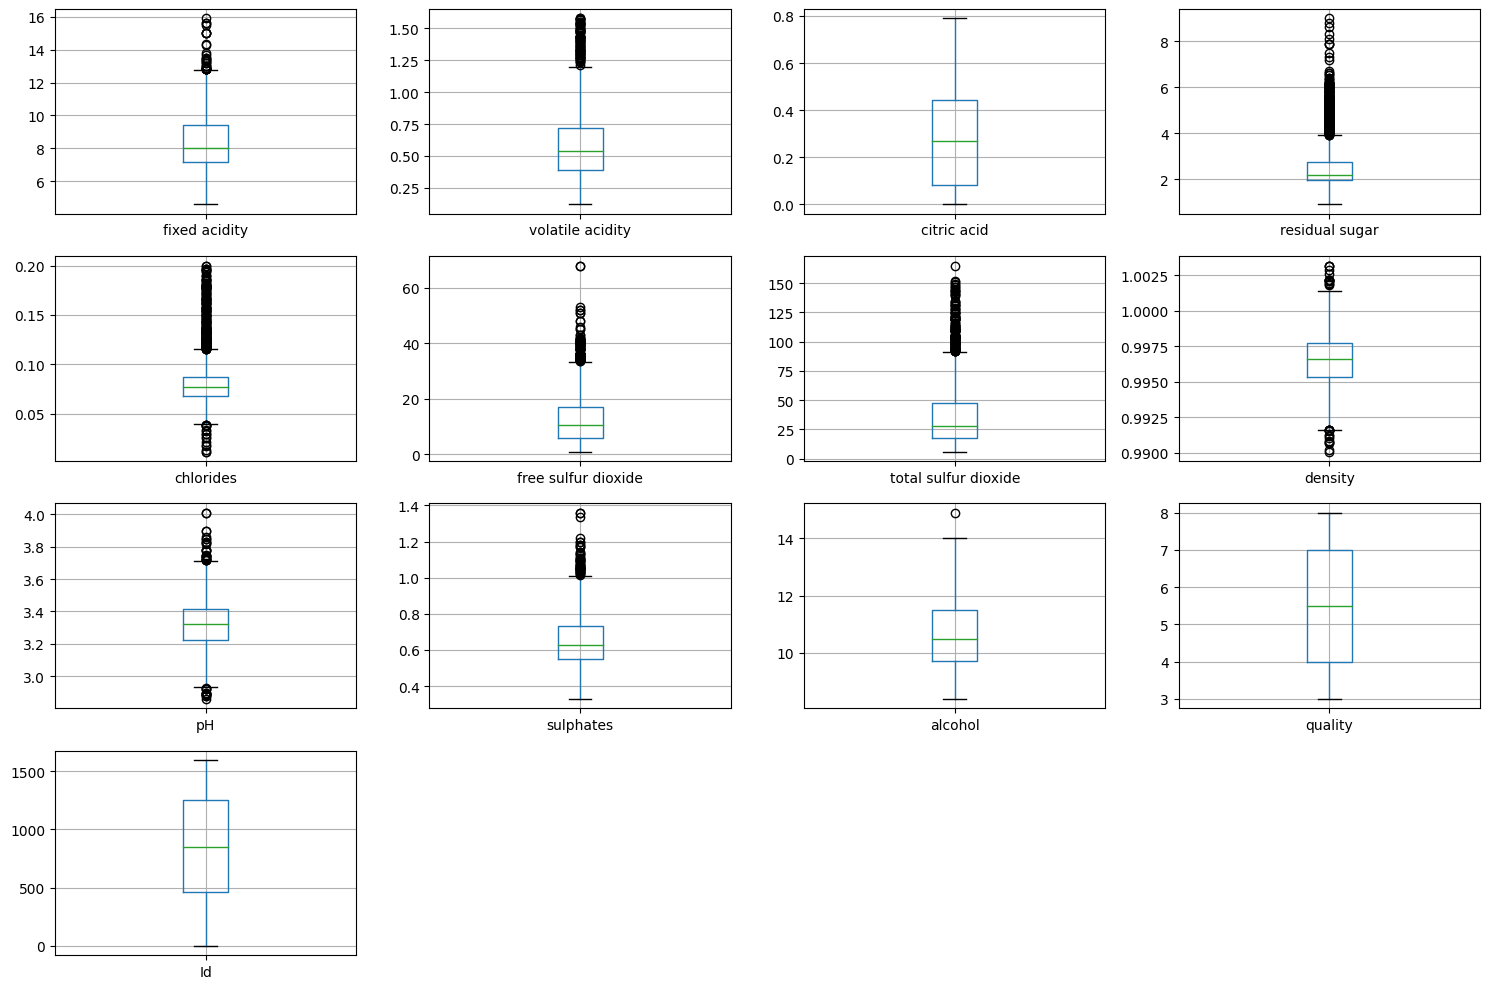

In [ ]:
#Understanding the feature set
# need to know about the graphs and distribution
print('\033[1mFeatures Distribution'.center(200))

nf = [i for i in features if i not in cf]

n=4 #4 plots per row
plt.figure(figsize=[15,2.5*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,2.5*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()#subplots and do not overlap.
plt.show()

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                      Total Null Values  Percentage
fixed acidity                         0         0.0
volatile acidity                      0         0.0
citric acid                           0         0.0
residual sugar                        0         0.0
chlorides                             0         0.0
free sulfur dioxide                   0         0.0
total sulfur dioxide                  0         0.0
density                               0         0.0
pH                                    0         0.0
sulphates                             0         0.0
alcohol                               0         0.0
quality                               0         0.0
Id                                    0         0.0


In [ ]:
#Converting categorical Columns to Numeric

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

# #Target Variable
# MAP={}
# for i,e in enumerate(df1[target].unique()):
#     MAP[e]=i
# df1[target]=df1[target].map(MAP)
# print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

(1143, 13)

In [ ]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.06)
        Q3 = df4[i].quantile(0.94)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Inference: Before removal of outliers, The dataset had 1143 samples.
Inference: After removal of outliers, The dataset now has 1106 samples.


In [ ]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
5    467
6    445
7    140
4     32
8     16
3      6
Name: quality, dtype: int64

Class distribution after applying SMOTE Technique:
5    467
6    467
7    467
4    467
8    467
3    467
Name: quality, dtype: int64


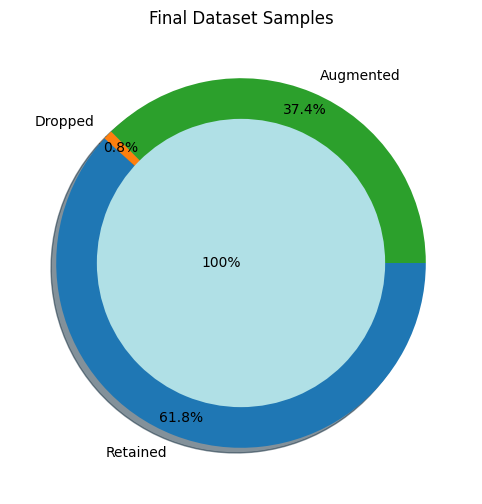


Inference:The final dataset after cleanup has 2802 samples & 13 columns.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

In [ ]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (2802, 12) (2802,) 
Training set  --->  (2241, 12) (2241,) 
Testing set   --->  (561, 12)  (561,)


In [ ]:
#Feature Scaling (Standardization) #to maintain consistency and avoid data leakage.

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03,2.241000e+03
mean,-1.357038e-15,2.481034e-16,-2.568227e-16,3.337109e-16,2.219455e-16,-3.725514e-17,4.597443e-17,-8.336908e-14,2.419206e-15,-5.152307e-16,-3.852340e-16,-6.341301e-18
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-2.277843e+00,-1.840521e+00,-1.392988e+00,-1.589007e+00,-2.906563e+00,-1.378135e+00,-1.167374e+00,-3.504813e+00,-3.104787e+00,-2.288470e+00,-1.970548e+00,-1.833729e+00
25%,-7.142685e-01,-7.758381e-01,-9.798342e-01,-5.892006e-01,-5.620279e-01,-8.141991e-01,-7.424469e-01,-6.928109e-01,-6.775251e-01,-7.309426e-01,-8.077848e-01,-8.206959e-01
50%,-2.119696e-01,-1.503337e-01,-3.706893e-02,-3.539103e-01,-1.852276e-01,-2.760082e-01,-3.353746e-01,-1.593508e-02,-3.567551e-02,-1.852762e-01,-1.561045e-01,2.605068e-02
75%,6.087559e-01,5.219437e-01,8.161328e-01,1.261756e-01,2.334394e-01,4.264595e-01,4.164461e-01,6.445112e-01,6.131038e-01,5.970750e-01,7.067723e-01,9.012409e-01
max,4.337279e+00,3.942556e+00,2.573388e+00,5.916581e+00,4.833541e+00,6.178604e+00,4.936129e+00,3.542841e+00,4.567992e+00,5.088852e+00,2.865901e+00,1.660468e+00



                                Standardardization on Testing set                                


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,0.032190,-0.018055,0.031805,0.063700,0.017336,-0.091383,-0.121335,0.023484,-0.052192,-0.019457,-0.015213,0.004120
std,1.079613,0.993162,1.027975,1.078478,0.984572,0.971713,0.927324,1.018370,1.018587,0.992610,1.030252,1.000323
min,-2.097430,-1.840521,-1.392988,-1.113970,-1.650562,-1.378135,-1.206004,-2.712760,-2.891835,-2.318472,-1.970548,-1.811849
25%,-0.714268,-0.810658,-0.991330,-0.566699,-0.562028,-0.814199,-0.785179,-0.646330,-0.760003,-0.736881,-0.847801,-0.825072
50%,-0.214633,-0.185313,0.012816,-0.353910,-0.184803,-0.403557,-0.429614,0.047408,-0.169115,-0.160999,-0.168508,0.017299
75%,0.729031,0.516280,0.879462,0.244169,0.233439,0.332221,0.261927,0.627871,0.631523,0.575433,0.662718,0.890301
max,4.517692,3.762540,2.422766,6.106596,4.964377,6.178604,4.433942,3.569781,3.043406,5.088852,3.643188,1.653905


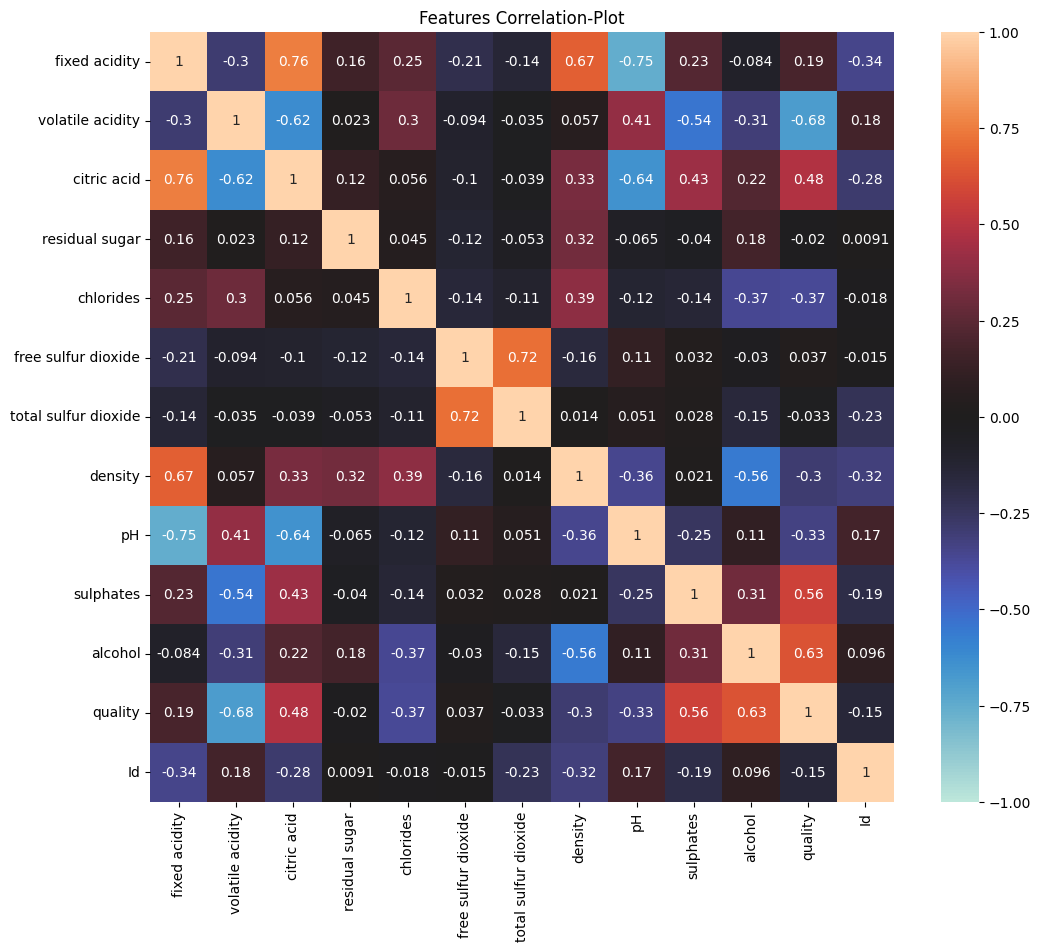

In [ ]:
 #Checking the correlation using heatmap

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

100%|██████████| 11/11 [00:07<00:00,  1.44it/s]


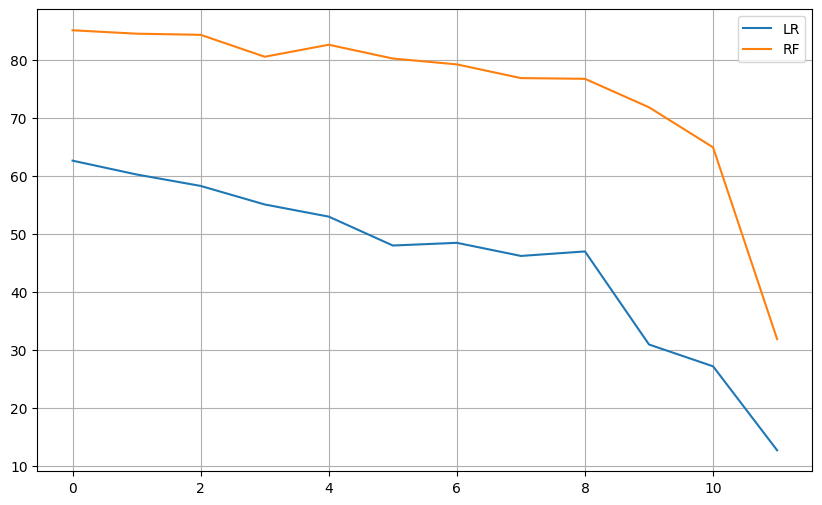

In [ ]:
# Calculate the VIFs to remove multicollinearity #Multicollinearity refers to the high correlation between two or more independent variables (features) in a statistical or machine learning model. This high correlation can cause problems in predictive modeling and statistical analysis.

DROP=[]; scores1=[]; scores2=[]; scores3=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)

for i in tqdm(range(len(X.columns.values)-1)):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)

plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
#plt.ylim([0.7,0.85])
plt.legend()
plt.grid()
plt.show()

100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


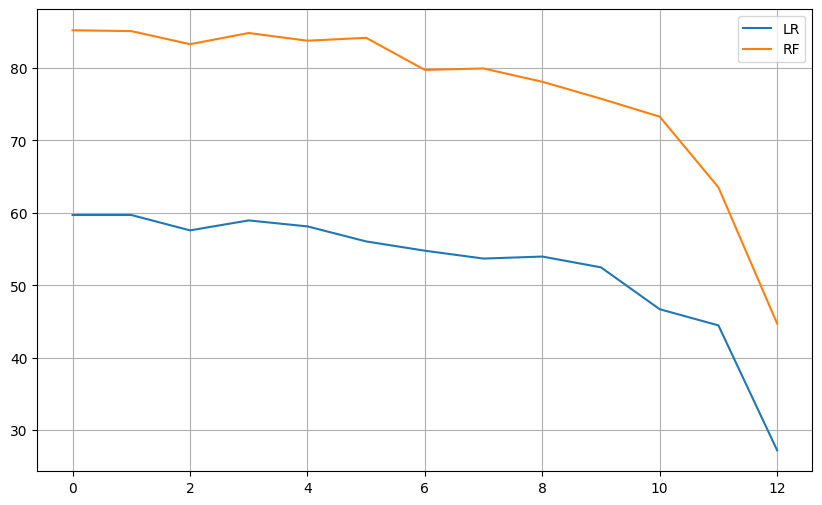

In [ ]:
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression(solver='liblinear').fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression(solver='liblinear').fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

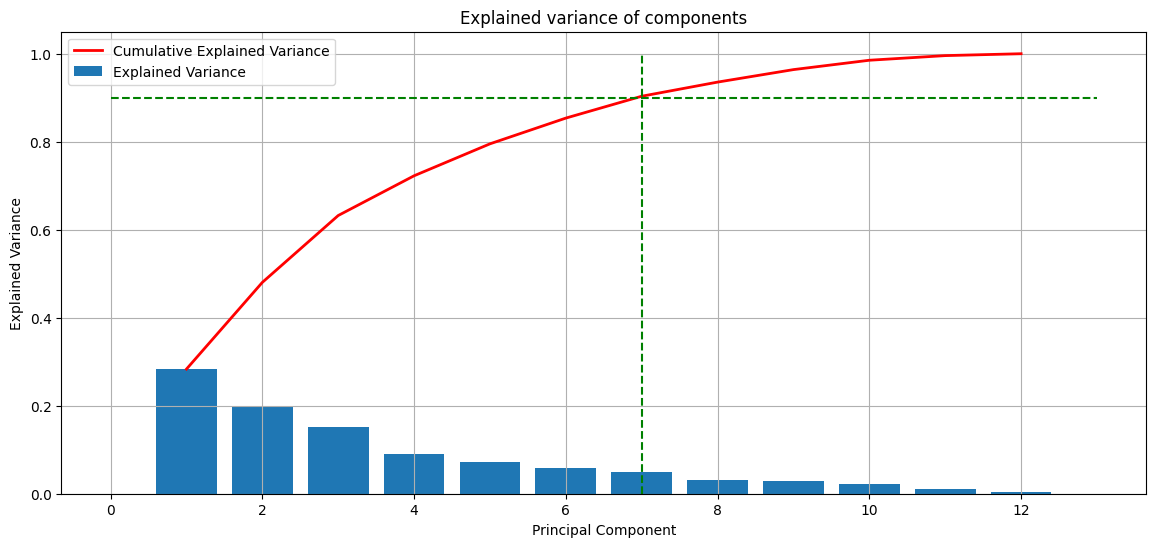

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([7,7],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()


100%|██████████| 12/12 [00:09<00:00,  1.26it/s]


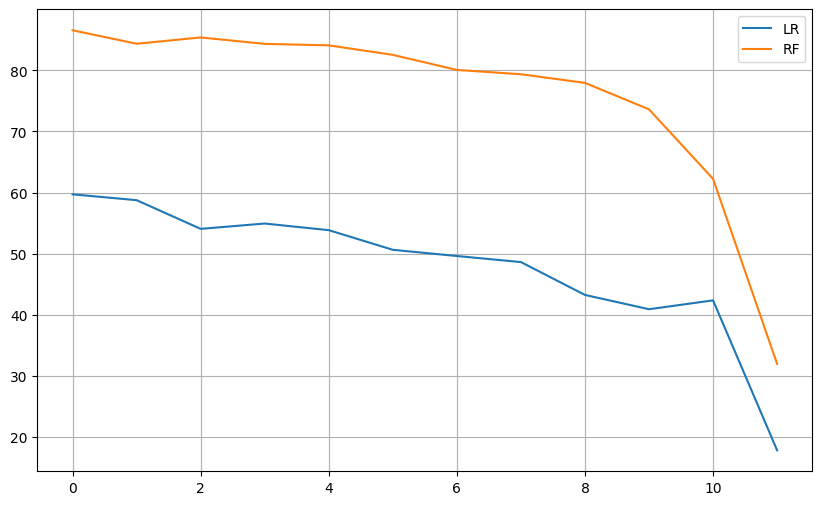

In [ ]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

scores1=[]; scores2=[]; scores3=[]
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores1.append(f1_score(Test_Y,LogisticRegression(solver='liblinear').fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)

plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns))
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
# Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
# Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

62.62774229816659
85.42346071819739
(2241, 12)
(561, 12)


In [ ]:
#Let us create first create a table to store the results of various models

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [ ]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 61.3%
F1 Score = 59.699999999999996%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 4 52  8 12  5  0]
 [ 9 17 52  9  5  5]
 [ 5 12 29 30 17  9]
 [ 0  6  1 13 44 31]
 [ 0  0  0  0 20 77]]

Classification Report:
               precision    recall  f1-score   support

           3       0.83      1.00      0.91        89
           4       0.60      0.64      0.62        81
           5       0.58      0.54      0.56        97
           6       0.47      0.29      0.36       102
           7       0.48      0.46      0.47        95
           8       0.63      0.79      0.70        97

    accuracy                           0.61       561
   macro avg       0.60      0.62      0.60       561
weighted avg       0.59      0.61      0.60       561



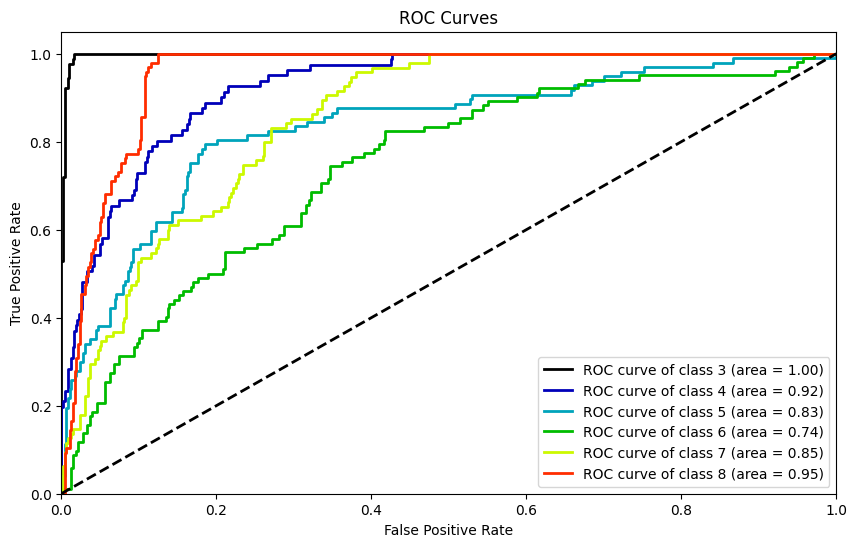


Interpreting the Output of Logistic Regression:

intercept  -7.10197337327817
classes [3 4 5 6 7 8]


,coeff
fixed acidity,-0.480871
volatile acidity,3.266175
citric acid,2.012565
residual sugar,-0.006530
chlorides,0.190622
free sulfur dioxide,-0.749955
total sulfur dioxide,-0.969281
density,1.441759
pH,0.679202
sulphates,-0.089119


In [ ]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression(solver='liblinear')

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)

LR = LR_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 77.5%
F1 Score = 77.0%

 Confusiton Matrix:
 [[86  0  1  2  0  0]
 [ 0 75  5  1  0  0]
 [ 2 11 52 29  3  0]
 [ 0  6 24 56 13  3]
 [ 0  0  3  5 75 12]
 [ 0  0  0  1  5 91]]

Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.97      0.97        89
           4       0.82      0.93      0.87        81
           5       0.61      0.54      0.57        97
           6       0.60      0.55      0.57       102
           7       0.78      0.79      0.79        95
           8       0.86      0.94      0.90        97

    accuracy                           0.78       561
   macro avg       0.77      0.78      0.78       561
weighted avg       0.77      0.78      0.77       561



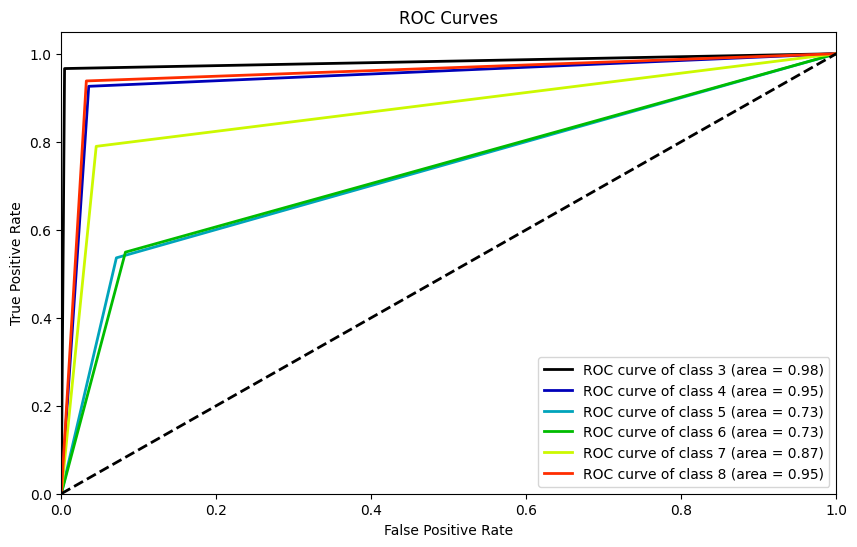


Interpreting the output of Decision Tree:



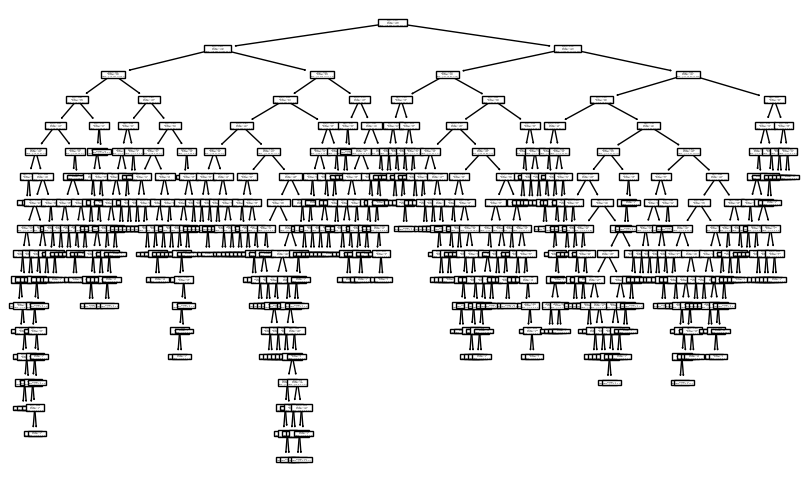

In [ ]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()


<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 85.6%
F1 Score = 85.1%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 80  1  0  0  0]
 [ 0  2 71 19  4  1]
 [ 0  2 23 60 14  3]
 [ 0  0  2  4 84  5]
 [ 0  0  0  0  1 96]]

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        89
           4       0.95      0.99      0.97        81
           5       0.73      0.73      0.73        97
           6       0.72      0.59      0.65       102
           7       0.82      0.88      0.85        95
           8       0.91      0.99      0.95        97

    accuracy                           0.86       561
   macro avg       0.86      0.86      0.86       561
weighted avg       0.85      0.86      0.85       561



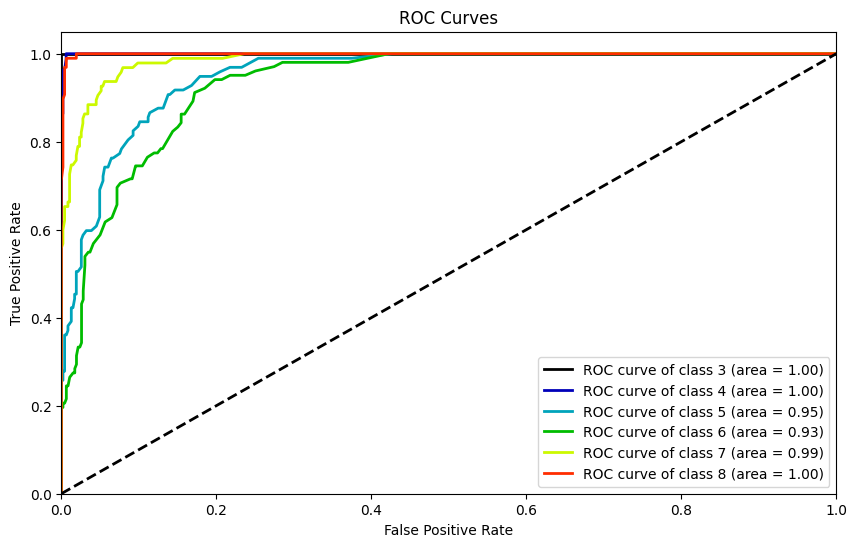


Interpreting the output of Random Forest:



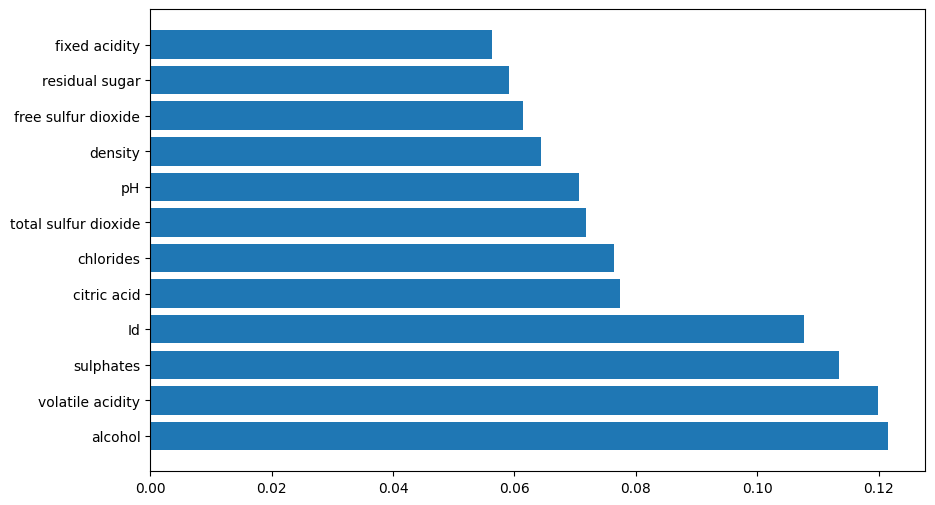

In [ ]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 51.2%
F1 Score = 48.6%

 Confusiton Matrix:
 [[64  5 20  0  0  0]
 [17 49  8  3  4  0]
 [18 21 43  5  7  3]
 [11 18 25 12 16 20]
 [ 0  2  4 16 47 26]
 [ 0  3  0  3 19 72]]

Classification Report:
               precision    recall  f1-score   support

           3       0.58      0.72      0.64        89
           4       0.50      0.60      0.55        81
           5       0.43      0.44      0.44        97
           6       0.31      0.12      0.17       102
           7       0.51      0.49      0.50        95
           8       0.60      0.74      0.66        97

    accuracy                           0.51       561
   macro avg       0.49      0.52      0.49       561
weighted avg       0.48      0.51      0.49       561



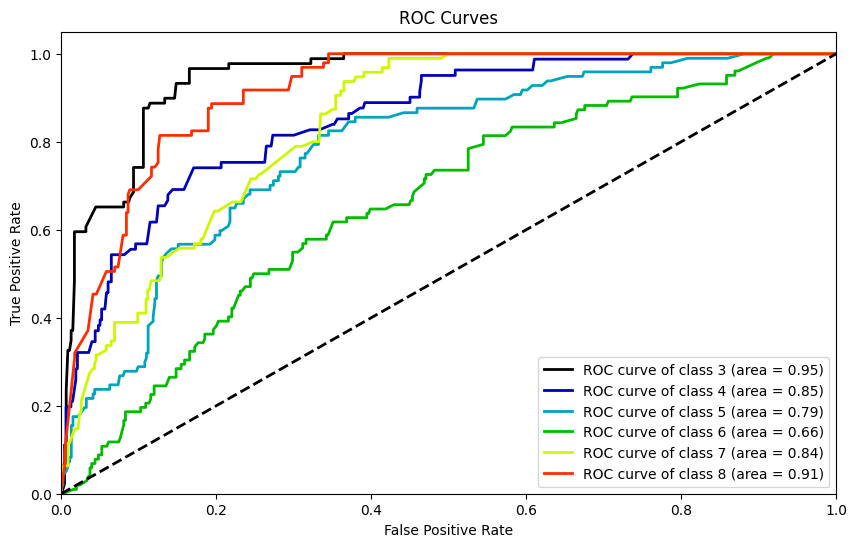

In [ ]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 77.7%
F1 Score = 76.6%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 78  1  2  0  0]
 [ 1 15 60 16  2  3]
 [ 2 11 23 50 13  3]
 [ 0  1  3 12 62 17]
 [ 0  0  0  0  0 97]]

Classification Report:
               precision    recall  f1-score   support

           3       0.97      1.00      0.98        89
           4       0.74      0.96      0.84        81
           5       0.69      0.62      0.65        97
           6       0.62      0.49      0.55       102
           7       0.81      0.65      0.72        95
           8       0.81      1.00      0.89        97

    accuracy                           0.78       561
   macro avg       0.77      0.79      0.77       561
weighted avg       0.77      0.78      0.77       561



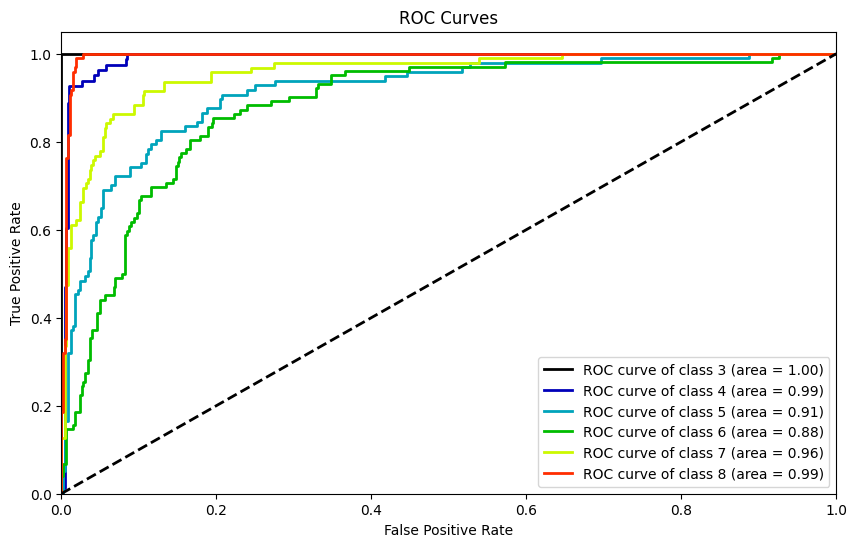

In [ ]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = SVM_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 83.2%
F1 Score = 82.39999999999999%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 1 80  0  0  0  0]
 [ 0  6 64 21  4  2]
 [ 0  8 24 54 12  4]
 [ 0  2  1  4 84  4]
 [ 0  0  0  0  1 96]]

Classification Report:
               precision    recall  f1-score   support

           3       0.99      1.00      0.99        89
           4       0.83      0.99      0.90        81
           5       0.72      0.66      0.69        97
           6       0.68      0.53      0.60       102
           7       0.83      0.88      0.86        95
           8       0.91      0.99      0.95        97

    accuracy                           0.83       561
   macro avg       0.83      0.84      0.83       561
weighted avg       0.82      0.83      0.82       561



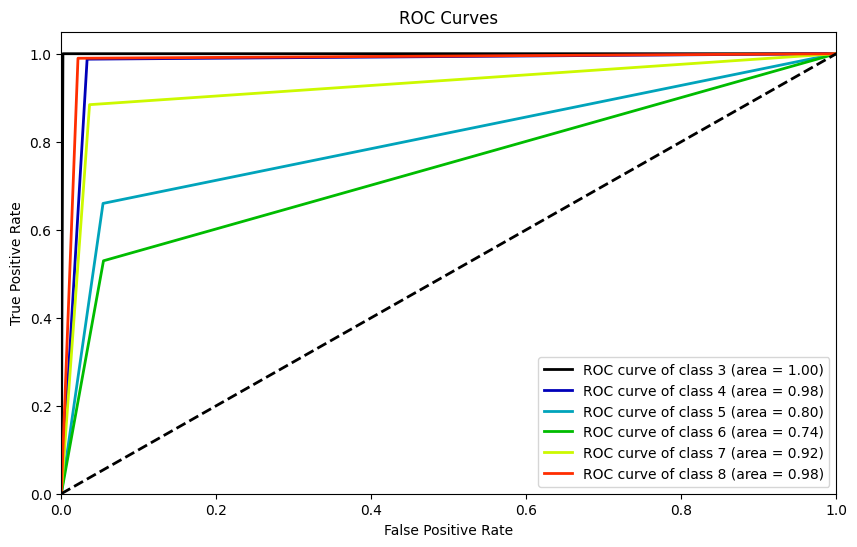

In [ ]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 86.3%
F1 Score = 86.0%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 80  1  0  0  0]
 [ 0  3 72 19  3  0]
 [ 0  2 22 65 12  1]
 [ 0  0  1  8 81  5]
 [ 0  0  0  0  0 97]]

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        89
           4       0.94      0.99      0.96        81
           5       0.75      0.74      0.75        97
           6       0.71      0.64      0.67       102
           7       0.84      0.85      0.85        95
           8       0.94      1.00      0.97        97

    accuracy                           0.86       561
   macro avg       0.86      0.87      0.87       561
weighted avg       0.86      0.86      0.86       561



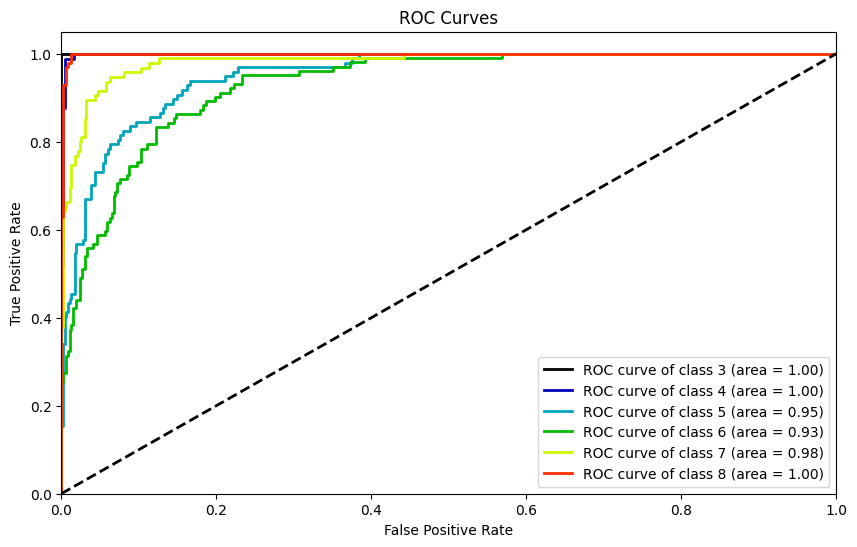

In [ ]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

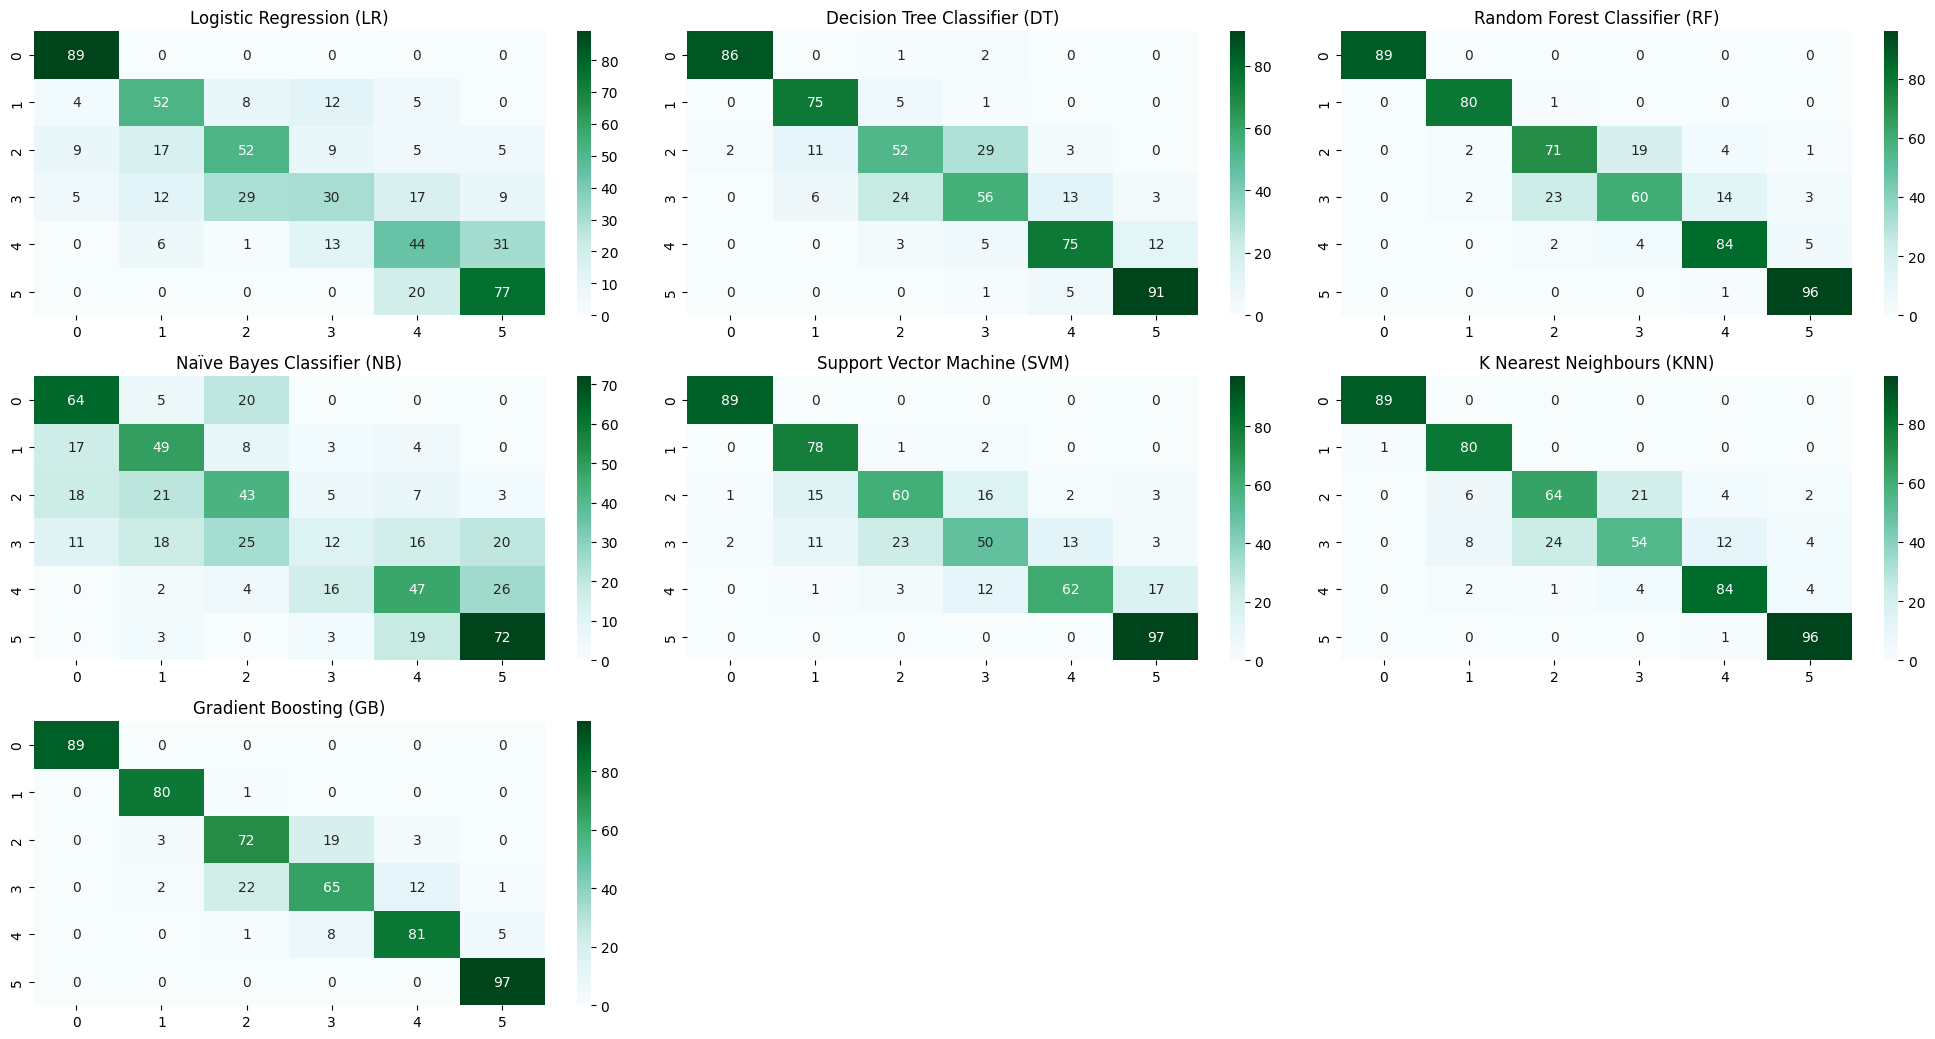

In [ ]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"

def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])

    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB])

                                    ML Algorithms Comparison                                    


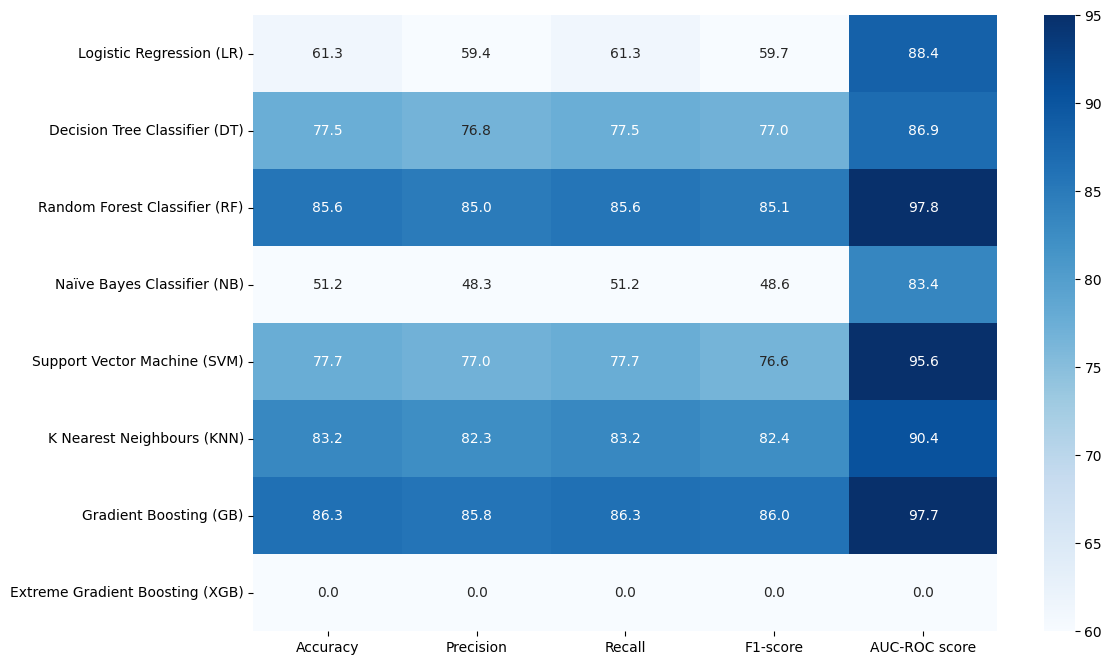

In [ ]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()